# pytorch tutorial
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

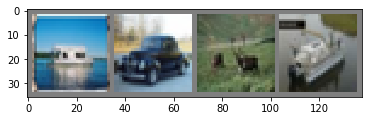

 ship   car  deer  ship


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.143
[1,  4000] loss: 1.820
[1,  6000] loss: 1.656
[1,  8000] loss: 1.565
[1, 10000] loss: 1.510
[1, 12000] loss: 1.437
[2,  2000] loss: 1.410
[2,  4000] loss: 1.351
[2,  6000] loss: 1.323
[2,  8000] loss: 1.300
[2, 10000] loss: 1.276
[2, 12000] loss: 1.267
[3,  2000] loss: 1.216
[3,  4000] loss: 1.205
[3,  6000] loss: 1.189
[3,  8000] loss: 1.163
[3, 10000] loss: 1.167
[3, 12000] loss: 1.159
[4,  2000] loss: 1.071
[4,  4000] loss: 1.101
[4,  6000] loss: 1.108
[4,  8000] loss: 1.101
[4, 10000] loss: 1.096
[4, 12000] loss: 1.092
[5,  2000] loss: 1.022
[5,  4000] loss: 1.038
[5,  6000] loss: 1.032
[5,  8000] loss: 1.032
[5, 10000] loss: 1.018
[5, 12000] loss: 1.019
[6,  2000] loss: 0.955
[6,  4000] loss: 0.971
[6,  6000] loss: 0.962
[6,  8000] loss: 0.988
[6, 10000] loss: 0.963
[6, 12000] loss: 0.985
[7,  2000] loss: 0.871
[7,  4000] loss: 0.923
[7,  6000] loss: 0.936
[7,  8000] loss: 0.945
[7, 10000] loss: 0.931
[7, 12000] loss: 0.933
[8,  2000] loss: 0.826
[8,  4000] 

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 77 %
Accuracy of  bird : 53 %
Accuracy of   cat : 39 %
Accuracy of  deer : 50 %
Accuracy of   dog : 59 %
Accuracy of  frog : 77 %
Accuracy of horse : 64 %
Accuracy of  ship : 77 %
Accuracy of truck : 73 %
